In [62]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import  EarlyStopping
import matplotlib.pyplot as plt

In [63]:
dfHeartClassification = pd.read_csv("../data/heart.csv",sep=",")
str_values = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
encoder = LabelEncoder()
for value in str_values:
    dfHeartClassification[value] = encoder.fit_transform(dfHeartClassification[value])
dfHeartClassification.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [64]:
dfHeartClassification.shape

(918, 12)

In [65]:
x = dfHeartClassification.drop(['HeartDisease'], axis = 1)
y = dfHeartClassification['HeartDisease']

In [66]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.3)

In [67]:
mm = MinMaxScaler()
xTrain_mm = pd.DataFrame(mm.fit_transform(xTrain),columns=[
    'Age', 'Sex',
    'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 
    'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
xTest_mm = pd.DataFrame(mm.transform(xTest),columns=[
    'Age', 'Sex',
    'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 
    'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])

In [68]:
yTrain = pd.get_dummies(data=yTrain,columns =['HeartDisease'])
yTest = pd.get_dummies(data=yTest,columns =['HeartDisease'])

In [91]:
model_nn = keras.Sequential([keras.layers.Dense(12, kernel_initializer='he_uniform', input_shape=(11,), activation='relu'),
                            keras.layers.Dense(7, kernel_initializer='he_uniform', activation='relu'),
                            keras.layers.Dense(2, kernel_initializer='glorot_uniform', activation='softmax'),
                            ])

es = EarlyStopping(patience=3, restore_best_weights=True)

model_nn.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer='Adam')
history = model_nn.fit(xTrain_mm, yTrain, validation_data=(xTest_mm,yTest), epochs=100, callbacks=es)

Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 0.6305 - accuracy: 0.6978 - val_loss: 0.6385 - val_accuracy: 0.7283
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.7492 - val_loss: 0.6060 - val_accuracy: 0.7283
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.7601 - val_loss: 0.5756 - val_accuracy: 0.7464
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7477 - val_loss: 0.5526 - val_accuracy: 0.7355
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7461 - val_loss: 0.5253 - val_accuracy: 0.7500
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7664 - val_loss: 0.49

In [92]:
test_loss, test_acc = model_nn.evaluate(xTest_mm, yTest)
print("test_accuracy:", test_acc)

9/9 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8333
test_accuracy: 0.8333333134651184


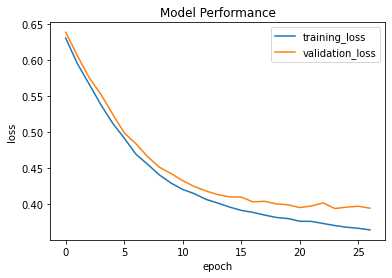

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()